In [1]:
import time

import scipy.io as scio
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split  
from sklearn.svm import SVC  
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.metrics.classification import cohen_kappa_score
from sklearn.metrics import accuracy_score

In [2]:
class Dataset:
    
    def __init__(self,name,form):
        
        self.name=name
        self.form=form
        
    def load(self):
        
        self.data_dict=scio.loadmat(self.name+self.form)
        self.data=self.data_dict[self.name]

# Designing input and output for training

In [3]:
bots=Dataset('Botswana','.mat')
bots.load()
data=bots.data
shp=np.shape(data)
row=shp[0]
col=shp[1]
bands=shp[2]
    
X=data.reshape(row*col,bands)
    
#Obtaining data in desired form
bots_gt=Dataset('Botswana_gt','.mat')
bots_gt.load()
y=bots_gt.data.reshape(row*col,1)
ind=np.where(y[:,0]!=0)
X=X[ind]
y = y[y!=0]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [6]:
from sklearn.preprocessing import StandardScaler

In [8]:
sc = StandardScaler()
sc.fit_transform(X_train)
Xn_train = sc.transform(X_train)
Xn_test = sc.transform(X_test)

C:\Users\Ankit\Anaconda2\envs\py36\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype uint16 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [16]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(Xn_train)

array([[  1.52819211e+01,   6.18577104e-01,  -6.24393060e-01, ...,
         -1.87239799e-02,   3.31730952e-02,  -3.68386882e-02],
       [ -7.87590219e-01,   2.60233615e+00,  -1.31290319e+00, ...,
         -1.04998451e-02,  -2.25664839e-02,   1.31392722e-02],
       [  5.06988752e+00,  -9.16689242e-01,  -3.12786994e-01, ...,
          1.58592073e-02,   1.03319224e-02,   1.88509523e-02],
       ..., 
       [ -1.50129216e+00,  -2.69962329e-01,  -6.51648241e-01, ...,
          2.52629976e-03,  -7.90860469e-03,   2.05114328e-02],
       [  4.84465912e+00,   1.74428060e+00,  -1.71259699e+00, ...,
         -6.46151590e-03,  -1.57610759e-02,  -1.83989845e-02],
       [  2.28658427e+00,   1.55628717e+00,  -1.44310769e+00, ...,
         -4.18134808e-03,   1.21494555e-02,  -2.44082103e-03]])

In [17]:
explained_variance = pca.explained_variance_ratio_

In [19]:
%matplotlib inline

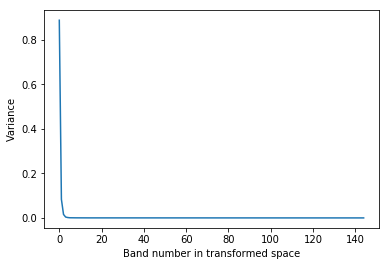

In [20]:
plt.plot(range(145),explained_variance)
plt.xlabel("Band number in transformed space")
plt.ylabel("Variance")
plt.show()

In [21]:
pca = PCA(n_components=3)
pca.fit_transform(Xn_train)

array([[ 15.2819211 ,   0.6185771 ,  -0.62439306],
       [ -0.78759022,   2.60233615,  -1.31290319],
       [  5.06988752,  -0.91668924,  -0.31278699],
       ..., 
       [ -1.50129216,  -0.26996233,  -0.65164824],
       [  4.84465912,   1.7442806 ,  -1.71259699],
       [  2.28658427,   1.55628717,  -1.44310769]])

In [26]:
Xpc_train = pca.transform(Xn_train)
Xpc_test = pca.transform(Xn_test)

# Grid Search to find best set of parameters using all bands: OVR

In [27]:
from sklearn.model_selection import GridSearchCV

tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
svm=SVC()
#scores = cross_val_score(svm, X_pc3, y, cv=5)
clf = GridSearchCV(svm, tuned_parameters, cv=5,)
clf.fit(Xn_train, y_train)

print("Best parameters set found:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))

Best parameters set found:

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores on development set:

0.836 (+/-0.044) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.472 (+/-0.025) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.897 (+/-0.031) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.836 (+/-0.044) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.949 (+/-0.013) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.898 (+/-0.033) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.968 (+/-0.012) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.945 (+/-0.018) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.963 (+/-0.019) for {'C': 1, 'kernel': 'linear'}
0.961 (+/-0.013) for {'C': 10, 'kernel': 'linear'}
0.961 (+/-0.013) for {'C': 100, 'kernel': 'linear'}
0.961 (+/-0.013) for {'C': 1000, 'kernel': 'linear'}


In [28]:
C=clf.best_params_['C']
if(clf.best_params_['kernel']=='rbf'):
    gamma=clf.best_params_['gamma']
    svm=SVC(kernel='rbf',C=C,gamma=gamma)
else:
    svm=SVC(kernel='linear',C=C)

In [29]:
start_time = time.time()
svm.fit(Xn_train,y_train)
y_pred=svm.predict(Xn_test)
acc=accuracy_score(y_test, y_pred)
print("Accuracy: %0.2f" % acc)
kappa_score = cohen_kappa_score(y_test,y_pred)
print("Kappa coefficient: %0.2f" % kappa_score)
print(confusion_matrix(y_test,y_pred))
print("--- %s seconds ---" % (time.time() - start_time))

Accuracy: 0.97
Kappa coefficient: 0.97
[[86  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 87  0  0  0  0  1  0  1  0  0  0  0]
 [ 0  0  0 69  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1 75  8  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1 87  0  0  3  0  0  0  0  0]
 [ 0  0  0  0  0  0 83  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 68  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0 93  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 85  3  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  1 96  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 52  2  0]
 [ 0  0  0  0  0  1  0  0  1  0  0  2 91  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 39]]
--- 0.34293413162231445 seconds ---


# Grid Search to find best set of parameters using PCs: OVR

In [30]:
from sklearn.model_selection import GridSearchCV

tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
svm=SVC()
#scores = cross_val_score(svm, X_pc3, y, cv=5)
clf = GridSearchCV(svm, tuned_parameters, cv=5,)
clf.fit(Xpc_train, y_train)

print("Best parameters set found:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))

Best parameters set found:

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores on development set:

0.777 (+/-0.041) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.452 (+/-0.035) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.827 (+/-0.055) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.774 (+/-0.040) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.843 (+/-0.033) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.827 (+/-0.052) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.860 (+/-0.029) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.835 (+/-0.028) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.847 (+/-0.026) for {'C': 1, 'kernel': 'linear'}
0.847 (+/-0.025) for {'C': 10, 'kernel': 'linear'}
0.846 (+/-0.027) for {'C': 100, 'kernel': 'linear'}
0.846 (+/-0.029) for {'C': 1000, 'kernel': 'linear'}


In [ ]:
C=clf.best_params_['C']
if(clf.best_params_['kernel']=='rbf'):
    gamma=clf.best_params_['gamma']
    svm=SVC(kernel='rbf',C=C,gamma=gamma)
else:
    svm=SVC(kernel='linear',C=C)

In [31]:
start_time = time.time()
svm.fit(Xpc_train,y_train)
ypc_pred=svm.predict(Xpc_test)
acc=accuracy_score(y_test, ypc_pred)
print("Accuracy: %0.2f" % acc)
kappa_score = cohen_kappa_score(y_test,ypc_pred)
print("Kappa coefficient: %0.2f" % kappa_score)
print(confusion_matrix(y_test,ypc_pred))
print("--- %s seconds ---" % (time.time() - start_time))

Accuracy: 0.86
Kappa coefficient: 0.85
[[86  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 83  0  0  0  0  0  1  4  0  0  1  0]
 [ 0  0  1 65  0  1  0  0  1  0  0  0  1  0]
 [ 0  3  0  2 61 17  0  0  0  0  0  1  0  0]
 [ 0  0  0  2 11 65  0  0 13  0  0  0  0  0]
 [ 0  0  0  0  0  0 83  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 57  0  2  0  6  3  0]
 [ 0  0  1  4  0  6  0  0 75  0  0  0  8  0]
 [ 0  0 12  0  0  0  0  3  0 63  6  0  4  0]
 [ 0  0  0  0  0  0  0  0  0  3 95  0  0  0]
 [ 0  0  0  0  0  0  0  4  0  0  0 49  1  0]
 [ 0  0  1  2  0  0  0  7  1  4  0  2 78  0]
 [ 0  0  0  0  0  0  6  0  0  0  0  0  0 33]]
--- 0.25267457962036133 seconds ---


# Grid Search to find best set of parameters using all bands: OVO

In [32]:
from sklearn.model_selection import GridSearchCV

tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
svm=SVC(decision_function_shape='ovo')
#scores = cross_val_score(svm, X_pc3, y, cv=5)
clf = GridSearchCV(svm, tuned_parameters, cv=5,)
clf.fit(Xn_train, y_train)

print("Best parameters set found:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))

Best parameters set found:

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores on development set:

0.836 (+/-0.044) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.472 (+/-0.025) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.897 (+/-0.031) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.836 (+/-0.044) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.949 (+/-0.013) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.898 (+/-0.033) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.968 (+/-0.012) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.945 (+/-0.018) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.963 (+/-0.019) for {'C': 1, 'kernel': 'linear'}
0.961 (+/-0.013) for {'C': 10, 'kernel': 'linear'}
0.961 (+/-0.013) for {'C': 100, 'kernel': 'linear'}
0.961 (+/-0.013) for {'C': 1000, 'kernel': 'linear'}


In [35]:
C=clf.best_params_['C']
if(clf.best_params_['kernel']=='rbf'):
    gamma=clf.best_params_['gamma']
    svm=SVC(kernel='rbf',C=C,gamma=gamma,decision_function_shape='ovo')
else:
    svm=SVC(kernel='linear',C=C,decision_function_shape='ovo')

In [37]:
start_time = time.time()
svm.fit(Xn_train,y_train)
y_pred=svm.predict(Xn_test)
acc=accuracy_score(y_test, y_pred)
print("Accuracy: %0.2f" % acc)
kappa_score = cohen_kappa_score(y_test,y_pred)
print("Kappa coefficient: %0.2f" % kappa_score)
print(confusion_matrix(y_test,y_pred))
print("--- %s seconds ---" % (time.time() - start_time))

Accuracy: 0.97
Kappa coefficient: 0.97
[[86  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 87  0  0  0  0  1  0  1  0  0  0  0]
 [ 0  0  0 69  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1 75  8  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1 87  0  0  3  0  0  0  0  0]
 [ 0  0  0  0  0  0 83  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 68  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0 93  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 85  3  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  1 96  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 52  2  0]
 [ 0  0  0  0  0  1  0  0  1  0  0  2 91  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 39]]
--- 0.45154905319213867 seconds ---


# Grid Search to find best set of parameters using PCs: OVO

In [38]:
from sklearn.model_selection import GridSearchCV

tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
svm=SVC(decision_function_shape='ovo')
#scores = cross_val_score(svm, X_pc3, y, cv=5)
clf = GridSearchCV(svm, tuned_parameters, cv=5,)
clf.fit(Xpc_train, y_train)

print("Best parameters set found:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))

Best parameters set found:

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores on development set:

0.777 (+/-0.041) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.452 (+/-0.035) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.827 (+/-0.055) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.774 (+/-0.040) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.843 (+/-0.033) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.827 (+/-0.052) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.860 (+/-0.029) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.835 (+/-0.028) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.847 (+/-0.026) for {'C': 1, 'kernel': 'linear'}
0.847 (+/-0.025) for {'C': 10, 'kernel': 'linear'}
0.846 (+/-0.027) for {'C': 100, 'kernel': 'linear'}
0.846 (+/-0.029) for {'C': 1000, 'kernel': 'linear'}


In [39]:
C=clf.best_params_['C']
if(clf.best_params_['kernel']=='rbf'):
    gamma=clf.best_params_['gamma']
    svm=SVC(kernel='rbf',C=C,gamma=gamma,decision_function_shape='ovo')
else:
    svm=SVC(kernel='linear',C=C,decision_function_shape='ovo')

In [40]:
start_time = time.time()
svm.fit(Xpc_train,y_train)
ypc_pred=svm.predict(Xpc_test)
acc=accuracy_score(y_test, ypc_pred)
print("Accuracy: %0.2f" % acc)
kappa_score = cohen_kappa_score(y_test,ypc_pred)
print("Kappa coefficient: %0.2f" % kappa_score)
print(confusion_matrix(y_test,ypc_pred))
print("--- %s seconds ---" % (time.time() - start_time))

Accuracy: 0.87
Kappa coefficient: 0.86
[[86  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 83  1  0  0  0  0  1  3  0  0  1  0]
 [ 0  0  1 64  1  1  0  0  2  0  0  0  0  0]
 [ 0  2  0  2 64 14  0  1  1  0  0  0  0  0]
 [ 0  0  0  3  8 64  0  0 16  0  0  0  0  0]
 [ 0  0  0  0  0  0 83  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 52  0  4  0 10  2  0]
 [ 0  0  1  4  0  5  0  0 76  0  0  0  8  0]
 [ 0  0 12  0  0  0  0  3  0 64  6  0  3  0]
 [ 0  0  0  0  0  0  0  0  0  5 93  0  0  0]
 [ 0  0  0  0  0  0  0  3  0  0  0 50  1  0]
 [ 0  0  0  2  0  0  0  7  2  3  0  2 79  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0 38]]
--- 0.21994590759277344 seconds ---
